Copyright (c) 2025 Mitsuru Ohno  
Use of this source code is governed by a BSD-3-style  
license that can be found in the LICENSE file.  

## 使用方法の要約
基本的な使用: RxnIVPsolv("sample_data.csv")でインスタンス化  
数値積分: get_ode_system()で必要なオブジェクトを取得  
エラーハンドリング: try-except文でエラーをキャッチ  
可視化: matplotlibで結果をプロット  
パラメータ解析: 異なる初期条件での比較  
これらの使用例は、現在のコードが正しく動作することを前提としています。もしエラーが発生した場合は、debug_ode_system()メソッドで詳細な情報を確認できます。  

## 反応式を記載したcsvファイルを指定する  

In [1]:
file_path = '../sample_data/sample_data_1.csv'  # CSVファイルのパスを指定

In [2]:
# development phase
# Add the parent directory (one level up from the notebook's location) to the Python path
import os
import sys

sys.path.append(os.path.join(os.getcwd(), '..'))

## 反応速度式をscipy.integrate.solve_ivpで処理できる連立微分方程式にする  

In [3]:
from dataclasses import dataclass, field
from typing import Optional

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

from src.rxnfit.build_ode import RxnODEbuild
from src.rxnfit.solv_ode import SolverConfig, RxnODEsolver

In [4]:
builded_rxnode = RxnODEbuild(file_path)

In [5]:
builded_rxnode.get_ode_info(debug_info=True)

number of species: 8
unique species: ['AcOEt', 'OHa1', 'AcOa1', 'EtOH', 'AcOiPr', 'iPrOH', 'EGOAc2', 'EG']
rate constant: {'k1': 0.054, 'k2': 0.044, 'k3': 0.031}

=== debug info ===
Successfully created function for AcOEt with args: ['t', 'AcOEt', 'OHa1', 'AcOa1', 'EtOH', 'AcOiPr', 'iPrOH', 'EGOAc2', 'EG']
Successfully created function for OHa1 with args: ['t', 'AcOEt', 'OHa1', 'AcOa1', 'EtOH', 'AcOiPr', 'iPrOH', 'EGOAc2', 'EG']
Successfully created function for AcOa1 with args: ['t', 'AcOEt', 'OHa1', 'AcOa1', 'EtOH', 'AcOiPr', 'iPrOH', 'EGOAc2', 'EG']
Successfully created function for EtOH with args: ['t', 'AcOEt', 'OHa1', 'AcOa1', 'EtOH', 'AcOiPr', 'iPrOH', 'EGOAc2', 'EG']
Successfully created function for AcOiPr with args: ['t', 'AcOEt', 'OHa1', 'AcOa1', 'EtOH', 'AcOiPr', 'iPrOH', 'EGOAc2', 'EG']
Successfully created function for iPrOH with args: ['t', 'AcOEt', 'OHa1', 'AcOa1', 'EtOH', 'AcOiPr', 'iPrOH', 'EGOAc2', 'EG']
Successfully created function for EGOAc2 with args: ['t', 'AcOE

In [6]:
builded_rxnode.rate_consts_dict

{'k1': 0.054, 'k2': 0.044, 'k3': 0.031}

## 数値積分を実行する  

In [7]:
# get_ode_infoの出力を参照して、初期値等の入力項目を渡す
config = SolverConfig(
    y0 = [1.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], # 初期濃度（必須）
    t_span=(0, 10),         # 時間範囲（必須）
    # t_eval: Optional[np.ndarray] = field(default=None),  # 任意
    method = "RK45",  # 任意
    rtol = 1e-6,    # 任意    
)

In [8]:
# 基本的な数値積分 -インスタンス化-
solved_rxnode = RxnODEsolver(builded_rxnode, config)

In [9]:
ode_construct, sol = solved_rxnode.solve_system()

Successfully created function for AcOEt with args: ['t', 'AcOEt', 'OHa1', 'AcOa1', 'EtOH', 'AcOiPr', 'iPrOH', 'EGOAc2', 'EG']
Successfully created function for OHa1 with args: ['t', 'AcOEt', 'OHa1', 'AcOa1', 'EtOH', 'AcOiPr', 'iPrOH', 'EGOAc2', 'EG']
Successfully created function for AcOa1 with args: ['t', 'AcOEt', 'OHa1', 'AcOa1', 'EtOH', 'AcOiPr', 'iPrOH', 'EGOAc2', 'EG']
Successfully created function for EtOH with args: ['t', 'AcOEt', 'OHa1', 'AcOa1', 'EtOH', 'AcOiPr', 'iPrOH', 'EGOAc2', 'EG']
Successfully created function for AcOiPr with args: ['t', 'AcOEt', 'OHa1', 'AcOa1', 'EtOH', 'AcOiPr', 'iPrOH', 'EGOAc2', 'EG']
Successfully created function for iPrOH with args: ['t', 'AcOEt', 'OHa1', 'AcOa1', 'EtOH', 'AcOiPr', 'iPrOH', 'EGOAc2', 'EG']
Successfully created function for EGOAc2 with args: ['t', 'AcOEt', 'OHa1', 'AcOa1', 'EtOH', 'AcOiPr', 'iPrOH', 'EGOAc2', 'EG']
Successfully created function for EG with args: ['t', 'AcOEt', 'OHa1', 'AcOa1', 'EtOH', 'AcOiPr', 'iPrOH', 'EGOAc2', '


=== Time-course plot ===


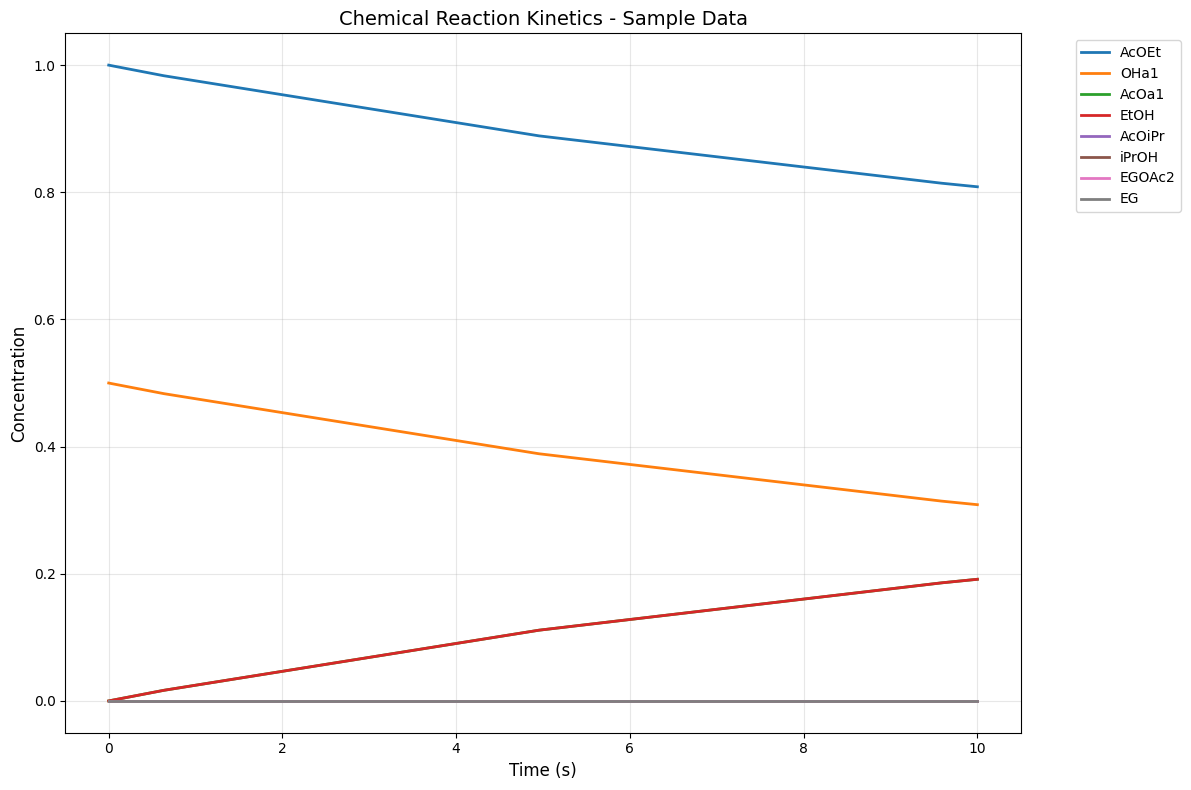


=== Concentration at the final time point ===
AcOEt: 0.808656
OHa1: 0.308656
AcOa1: 0.191344
EtOH: 0.191344
AcOiPr: 0.000000
iPrOH: 0.000000
EGOAc2: 0.000000
EG: 0.000000


In [10]:
solved_rxnode.solution_plot()